## Numerical Methods Endterm Project- Submitted by SEEMA

## Topic:Heavy Quarkonium Systems-Cornell Model

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import integrate 

In [19]:
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [20]:
N = 1001
#1 GeV = 5.068 fm-1
r_min = 1e-6 / 0.1972  # in GeV^-1
r_max = 5.19 / 0.1972  # in GeV^-1
r = np.linspace(r_min, r_max, N)
step_size = (r_max - r_min) / (N - 1)  

In [21]:
c_mass = 1.84               # mass of charm quark in GeV
c_bar_mass = 1.84          # mass of anti-charm quark in GeV
u_mass = 1.84 / 2          # reduced mass of charmonium system

hbar = 1
c = 1                     #speed of light
# values of constants in potential 
a = 2.34                  # in GeV^-1
kappa = 0.52
C0 = 2.8374659

The Cornell potential is given as- 
$$ V(r) = C_0 -\frac{\kappa}{r} + \frac{r}{a^2} $$

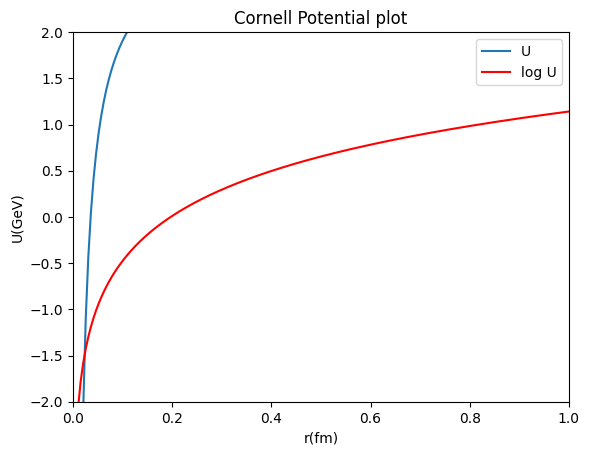

In [22]:
# Generating potential matrix

U1 = np.zeros(N)
log_u = np.zeros(N)
for i in range(N):
    U1[i] = (C0 - 1 * kappa / r[i]) + (r[i] / (a * a))
    log_u[i] = kappa * np.log(r[i]) + np.log(r[i]) / (a * a)
P_mat=np.diag(U1[1:N - 1])
plt.title("Cornell Potential plot")
plt.xlabel("r(fm)")
plt.ylabel("U(GeV)")
plt.plot(r * 0.1972, U1)
plt.plot(r * 0.1972, log_u, 'r')
plt.xlim(0,1)
plt.ylim(-2,2)
plt.legend(['U', 'log U'])
plt.savefig('potential.png',dpi = 100, bbox_inches = 'tight')
plt.show()

In [23]:
# Generating KE matrix
C = (-1 * hbar ** 2) / (2 * u_mass * (step_size) ** 2)
KE_mat = C * (-2 * np.eye(N - 2) + np.diag(np.ones((N - 3)), 1) + np.diag(np.ones((N - 3)), -1))

3.0950029337285825


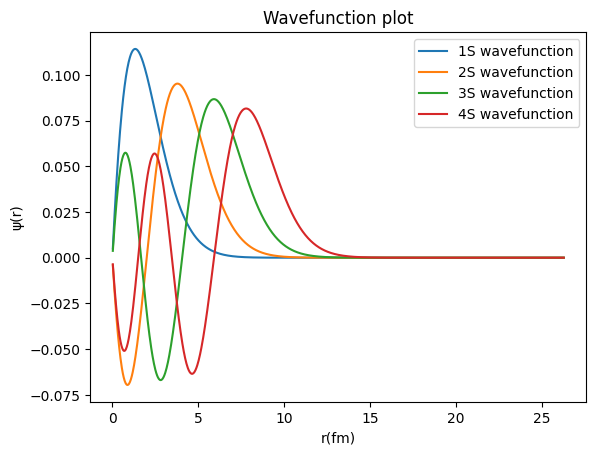

In [24]:
# Hamiltonian matrix

H_mat = P_mat + KE_mat
eig_val_mat, eig_vect_mat = np.linalg.eig(H_mat)
x=r[1:N - 1]  
sorted_indices = np.argsort(eig_val_mat)
print(eig_val_mat[sorted_indices[0]])
plt.plot(x, eig_vect_mat[:, sorted_indices[0]],label="1S wavefunction")
plt.plot(x, eig_vect_mat[:, sorted_indices[1]],label="2S wavefunction")
plt.plot(x, eig_vect_mat[:, sorted_indices[2]],label="3S wavefunction")
plt.plot(x, eig_vect_mat[:,sorted_indices[3]],label="4S wavefunction")
plt.xlabel("r(fm)")
plt.ylabel("ψ(r)")
plt.title("Wavefunction plot")
plt.legend()

0.02631833990545679


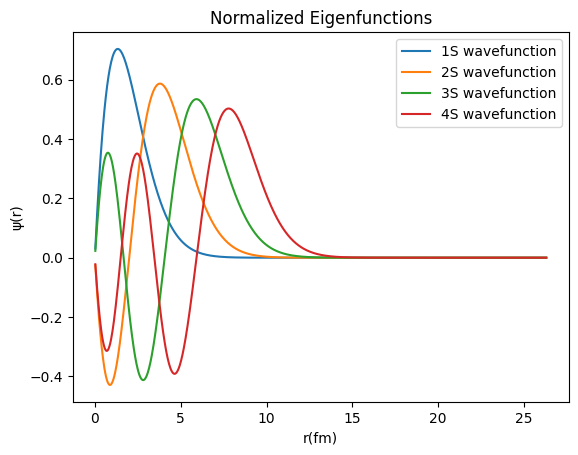

In [37]:
# Normalization of eigenfunctions

norm_eig_vect_mat = np.zeros((N - 2, 4))
for i in range(4):
    n=integrate.simps(np.abs(eig_vect_mat[:, sorted_indices[i]]*eig_vect_mat[:, sorted_indices[i]]), x=r[1:N - 1],even='avg')
    norm_eig_vect_mat[:, i] = (1 / np.sqrt(n)) * eig_vect_mat[:, sorted_indices[i]]

plt.plot(x, norm_eig_vect_mat[:, 0],label="1S wavefunction")
plt.plot(x, norm_eig_vect_mat[:, 1],label="2S wavefunction")
plt.plot(x, norm_eig_vect_mat[:, 2],label="3S wavefunction")
plt.plot(x, norm_eig_vect_mat[:, 3],label="4S wavefunction")
plt.xlabel("r(fm)")
plt.ylabel("ψ(r)")
plt.title("Normalized Eigenfunctions")
plt.legend()
plt.savefig('wavefunctions.png',dpi = 100, bbox_inches = 'tight')
print(n)

In [26]:
#Energy values in GeV

Energy=np.zeros(4)
for i in range(4):
    Energy[i]=eig_val_mat[sorted_indices[i]]
print("First four energy states(S-wave) are(in GeV) = ",Energy)


# Most probable radii values
radius = np.zeros(4)
for i in range(4):
    max_index = np.argmax(norm_eig_vect_mat[:, i] ** 2)
    radius[i] = r[max_index]
print("Most probable r (in fm) for first four states =", radius * 0.1972)

First four energy states(S-wave) are(in GeV) =  [3.09500293 3.68562148 4.10937479 4.46843715]
Most probable r (in fm) for first four states = [0.25950095 0.74217086 1.16256078 1.53105071]


In [40]:
# Expectation values of different physical quantities

r_new = r[1:N - 1]
r_mid1 = (r_new[:-1] + r_new[1:]) / 2
r_mid2 = (r_mid1[:-1] + r_mid1[1:]) / 2

exp_value_r = []
exp_value_rsq = []
rms_value_rsq = []
exp_value_p = []
exp_value_psq = []
exp_value_vsq = []
exp_value_U = []
exp_value_KE = []
sigma_r = []
sigma_p = []
uncertainity_product = [] 

for i in range(4):
    exp_value_r_i = np.trapz(r_new * (norm_eig_vect_mat[:, i] * norm_eig_vect_mat[:, i]), r_new)
    exp_value_rsq_i = np.trapz((r_new * r_new) * (norm_eig_vect_mat[:, i] * norm_eig_vect_mat[:, i]), r_new)
    rms_value_rsq_i = np.sqrt(exp_value_rsq_i) * 0.1972
    exp_value_r.append(exp_value_r_i)
    exp_value_rsq.append(exp_value_rsq_i)
    rms_value_rsq.append(rms_value_rsq_i)

    del1_sci = norm_eig_vect_mat[1:, i] - norm_eig_vect_mat[:-1, i]
    sci_mid1 = (norm_eig_vect_mat[:-1, i] + norm_eig_vect_mat[1:, i]) / 2
    del2_sci = del1_sci[1:] - del1_sci[:-1]
    sci_mid2 = (sci_mid1[:-1] + sci_mid1[1:]) / 2

    exp_value_p_i = np.trapz((-1j) * (hbar / step_size) * (sci_mid1 * del1_sci), r_mid1)
    exp_value_psq_i = np.trapz((-(hbar / step_size)**2) * sci_mid2 * del2_sci, r_mid2)              
    exp_value_vsq_i = exp_value_psq_i / (u_mass**2)
    exp_value_U_i = np.trapz(norm_eig_vect_mat[:, i] * (P_mat @ norm_eig_vect_mat[:, i]), r_new)
    exp_value_KE_i = (exp_value_psq_i) / (2 * u_mass)

    exp_value_p.append(exp_value_p_i)
    exp_value_psq.append(exp_value_psq_i)
    exp_value_vsq.append(exp_value_vsq_i)
    exp_value_U.append(exp_value_U_i)
    exp_value_KE.append(exp_value_KE_i)

    sigma_r_i = np.sqrt(exp_value_rsq_i - (exp_value_r_i)**2)
    sigma_p_i = np.sqrt(exp_value_psq_i - (exp_value_p_i)**2)
    uncertainity_product_i = (4 * np.pi * sigma_r_i * sigma_p_i) / hbar

    sigma_r.append(sigma_r_i)
    sigma_p.append(sigma_p_i)
    uncertainity_product.append(uncertainity_product_i) 
# these values are very sensitive to renormalization of wavefunction. 

### Taking three different trial analytic wavefunctions:
$(1) \psi(r) = Ar e^{-Br^2}$

$(2) \psi(r) = Ar^2 e^{-r/B} $

$(3) \psi(r) = Ar^2 e^{-r/B} $.

[0.77832632 0.20985085]


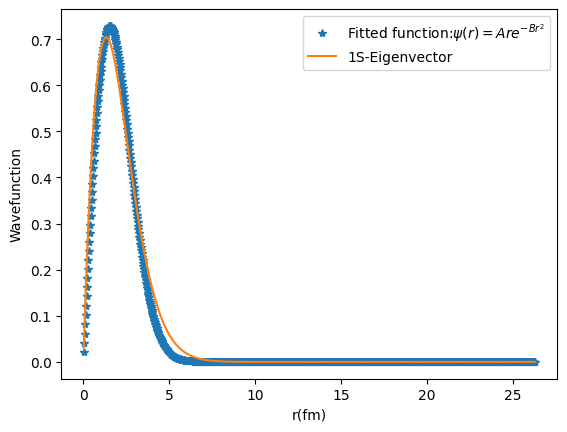

In [29]:
# 1st trial wavefunction for 1S state-
def tr_1s(r,A,B):
    return A*r*np.exp(-B*r*r)
result=curve_fit(tr_1s,x,norm_eig_vect_mat[:, 0])
print(result[0])
A=result[0][0]
B=result[0][1]
T_wf_1s=tr_1s(x,A,B)
plt.plot(x,T_wf_1s,'*',label=r"Fitted function:$\psi(r) = Ar e^{-Br^2}$")
plt.plot(x,norm_eig_vect_mat[:, 0],label="1S-Eigenvector")
plt.xlabel("r(fm)")
plt.ylabel("Wavefunction")
plt.legend()
plt.savefig('wf1.png',dpi = 100, bbox_inches = 'tight')

[2.93743556 0.68682275]


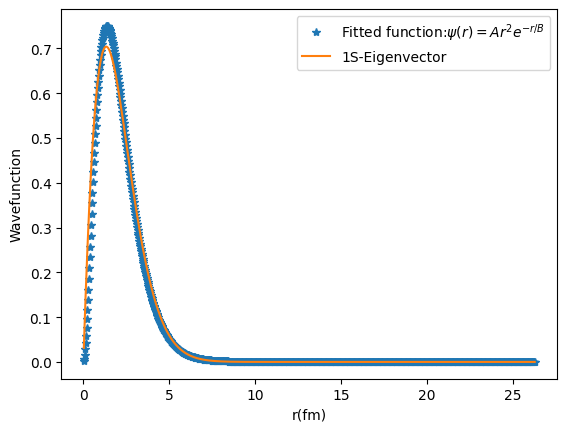

In [30]:
# 2nd trial wavefunction for 1S state-
def tr_2s(r,A,B):
    return A*r*r*np.exp(-r/B)
result1=curve_fit(tr_2s,x,norm_eig_vect_mat[:, 0])
print(result1[0])
A1=result1[0][0]
B1=result1[0][1]
T_wf2_1s=tr_2s(x,A1,B1)
plt.plot(x,T_wf2_1s,'*',label=r"Fitted function:$\psi(r) = Ar^2 e^{-r/B}$")
plt.plot(x,norm_eig_vect_mat[:, 0],label="1S-Eigenvector")
plt.xlabel("r(fm)")
plt.ylabel("Wavefunction")
plt.legend()
plt.savefig('wf2.png',dpi = 100, bbox_inches = 'tight')


[1.65581465 1.13055752]


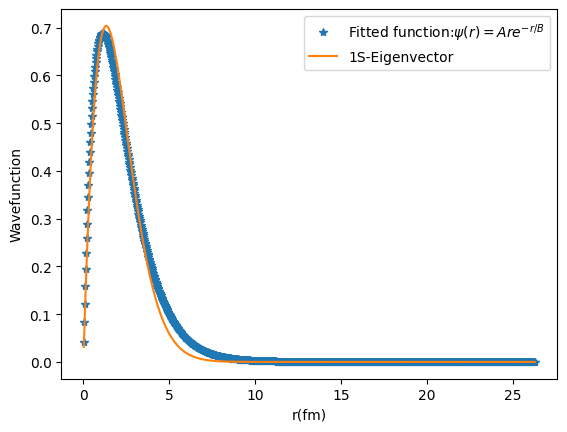

In [31]:
# 3rd trial wavefunction for 1S state-
def tr_3s(r,A,B):
    return A*r*np.exp(-r/B)
result2=curve_fit(tr_3s,x,norm_eig_vect_mat[:, 0])
print(result2[0])
A2=result2[0][0]
B2=result2[0][1]
T_wf3_1s=tr_3s(x,A2,B2)
plt.plot(x,T_wf3_1s,'*',label=r"Fitted function:$\psi(r) = Ar e^{-r/B}$")
plt.plot(x,norm_eig_vect_mat[:, 0],label="1S-Eigenvector")
plt.xlabel("r(fm)")
plt.ylabel("Wavefunction")
plt.legend()
plt.savefig('wf3.png',dpi = 100, bbox_inches = 'tight')